## Data Augmentation using Keras

Data augmentation occurs when you create new data based on modifications of your existing data. In our case, our data will be images and transformation can be of following type:

1. Flipping the images horizontally or vertically
2. Rotating the image
3. Zooming in or out on the image
4. Cropping the image
5. Varying the color on the image


In [17]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [18]:
import os
import numpy as np
import keras

from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from scipy import ndimage
import itertools


IMG = 'sample-dog-cat/train/cats/cat.5999.jpg'

In [19]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [20]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, channel_shift_range=10.0, horizontal_flip=True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


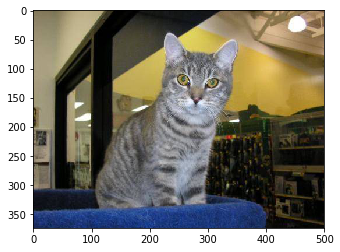

In [21]:
# Obtain Image
image = np.expand_dims(ndimage.imread(IMG),0)
plt.imshow(image[0])

In [22]:
# Generate batches of augumented images from this image
aug_iter = gen.flow(image)

In [23]:
# Get 10 samples of augumented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

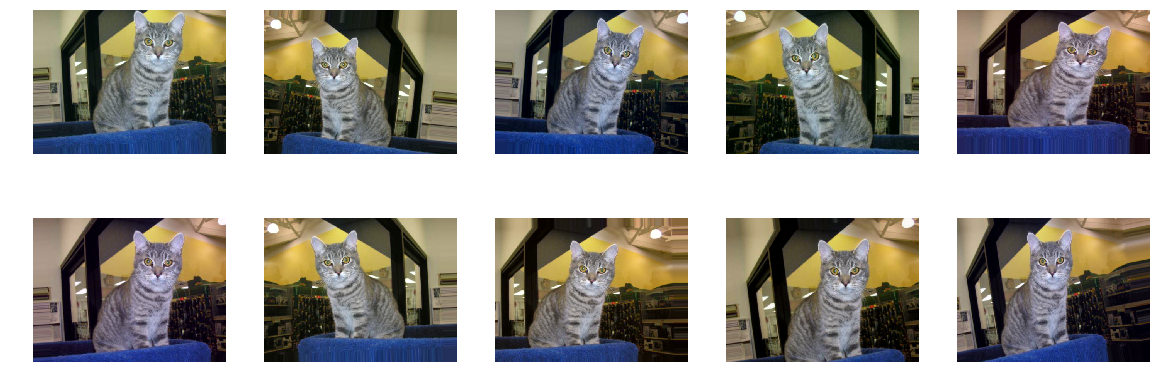

In [24]:
# Augmented images
plots(aug_images, figsize=(20,7), rows=2)